In [1]:
%matplotlib inline

# Decision Tree

## Import Dependencies

In [2]:
from time import time
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

## Load the Data

In [3]:
X_raw = np.load('./data/images.npy')
y_raw = np.load('./data/labels.npy')
y_train = y_raw[0:3900]
y_valid = y_raw[3900:4875]
y_test = y_raw[4875:6500]

print("X_train original shape:", X_raw.shape)
print("y_train original shape:", y_raw.shape)

X_train original shape: (6500, 28, 28)
y_train original shape: (6500,)


### Print Out Example Data

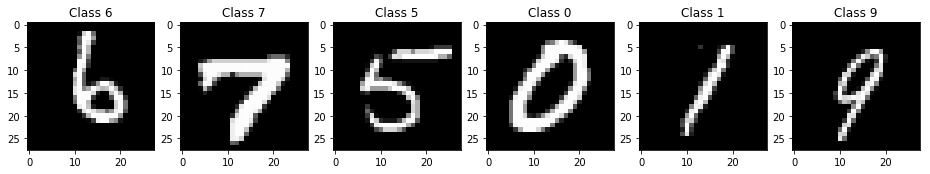

In [4]:
num_figures = 6
plt.figure(figsize=(16,8))
for i in range(num_figures):
    plt.subplot(1,num_figures,i+1)
    plt.imshow(X_raw[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_raw[i]))

## Reshape The Data

In [5]:
X_train = X_raw[0:3900].reshape(3900, 784)
X_valid = X_raw[3900:4875].reshape(975, 784)
X_test = X_raw[4875:6500].reshape(1625, 784)

X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_valid /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Validation matrix shape", X_valid.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (3900, 784)
Validation matrix shape (975, 784)
Testing matrix shape (1625, 784)


## Decision Tree Classifier
TODO: Add some parameters and graph for each.

In [6]:
t0 = time()
clf_dt = DecisionTreeClassifier()
print(clf_dt.fit(X_train.reshape(-1,28*28), y_train))
print('Time elapsed: %.2fs' % (time()-t0))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Time elapsed: 0.39s


## Run Prediction of Data

In [7]:
pred_dt = clf_dt.predict(X_test.reshape(-1,28*28))
print('Predicted', len(pred_dt), 'digits with accuracy:', accuracy_score(y_test, pred_dt))

Predicted 1625 digits with accuracy: 0.7790769230769231


In [8]:
correct_indices = np.nonzero(pred_dt == y_test)[0]
incorrect_indices = np.nonzero(pred_dt != y_test)[0]

## Display Correct Prediction Examples

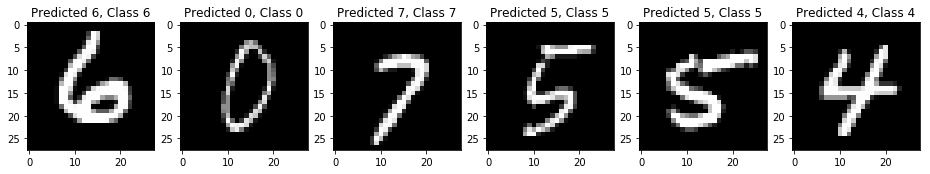

In [9]:
num_figures = 6
plt.figure(figsize=(16,8))
for i, correct in enumerate(correct_indices[:num_figures]):
    plt.subplot(1,num_figures,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(pred_dt[correct], y_test[correct]))

## Display Incorrect Prediction Examples

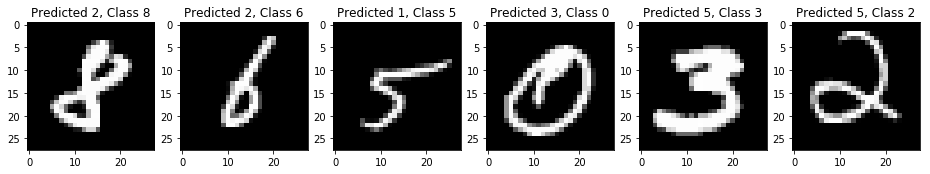

In [10]:
num_figures = 6
plt.figure(figsize=(16,8))
for i, incorrect in enumerate(incorrect_indices[:num_figures]):
    plt.subplot(1,num_figures,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(pred_dt[incorrect], y_test[incorrect]))

## Evaluation of Incorrect Prediction

Compared to the ANN, the decision tree classifier was less accurate and made some more obvious mistakes. It struggled often to identify major features that are similar between two numbers, as example six shows. The algorithm saw the top of the '7' as a downward curve and misinterpreted it as the top of the number '4'. It appears that the Decision Tree algorithm was worse at identifying the general shapes of a lot of numbers if they didn't fit closely to the general style of writing the number, as shown in the first two examples, where the '8' is more slanted and has a gap at the top, and the '0' has a line down the center. 

# Decision Trees with Different Depths

In [11]:
test_accuracy = []
valid_accuracy = []
t0 = time()
depth_range = 100
for i in range(1, depth_range):
    clf_dt_depth = DecisionTreeClassifier(max_depth=i)
    clf_dt_depth.fit(X_train.reshape(-1,28*28), y_train)
    test_pred_dt = clf_dt_depth.predict(X_test.reshape(-1,28*28))
    valid_pred_dt = clf_dt_depth.predict(X_valid.reshape(-1,28*28))
    test_accuracy.append(accuracy_score(y_test, test_pred_dt))
    valid_accuracy.append(accuracy_score(y_valid, valid_pred_dt))
    print('Episode: {}/{}'.format(i,depth_range))
print(clf_dt_depth.fit(X_train.reshape(-1,28*28), y_train))
print('Time elapsed: %.2fs' % (time()-t0))

Episode: 1/100
Episode: 2/100
Episode: 3/100
Episode: 4/100
Episode: 5/100
Episode: 6/100
Episode: 7/100
Episode: 8/100
Episode: 9/100
Episode: 10/100
Episode: 11/100
Episode: 12/100
Episode: 13/100
Episode: 14/100
Episode: 15/100
Episode: 16/100
Episode: 17/100
Episode: 18/100
Episode: 19/100
Episode: 20/100
Episode: 21/100
Episode: 22/100
Episode: 23/100
Episode: 24/100
Episode: 25/100
Episode: 26/100
Episode: 27/100
Episode: 28/100
Episode: 29/100
Episode: 30/100
Episode: 31/100
Episode: 32/100
Episode: 33/100
Episode: 34/100
Episode: 35/100
Episode: 36/100
Episode: 37/100
Episode: 38/100
Episode: 39/100
Episode: 40/100
Episode: 41/100
Episode: 42/100
Episode: 43/100
Episode: 44/100
Episode: 45/100
Episode: 46/100
Episode: 47/100
Episode: 48/100
Episode: 49/100
Episode: 50/100
Episode: 51/100
Episode: 52/100
Episode: 53/100
Episode: 54/100
Episode: 55/100
Episode: 56/100
Episode: 57/100
Episode: 58/100
Episode: 59/100
Episode: 60/100
Episode: 61/100
Episode: 62/100
Episode: 63/100
E

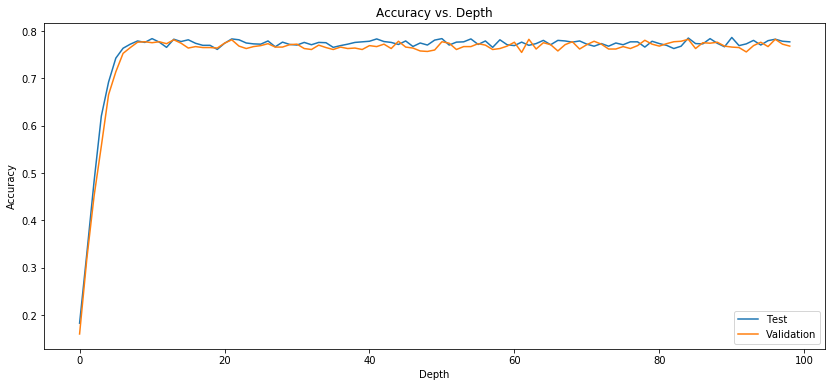

Highest test accuracy: 0.7864615384615384 at depth of 91
Highest validation accuracy: 0.7825641025641026 at depth of 63


In [35]:
plt.figure(figsize=(14,6))
plt.title('Accuracy vs. Depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.plot(test_accuracy)
plt.plot(valid_accuracy)
plt.legend(['Test', 'Validation'])
plt.show()

print('Highest test accuracy: {} at depth of {}'
      .format(max(test_accuracy), test_accuracy.index(max(test_accuracy))+1))
print('Highest validation accuracy: {} at depth of {}'
      .format(max(valid_accuracy), valid_accuracy.index(max(valid_accuracy))+1))

## Use the best depth

In [13]:
clf_dt_best_depth = DecisionTreeClassifier(max_depth=test_accuracy.index(max(test_accuracy))+1)
clf_dt_best_depth.fit(X_train.reshape(-1,28*28), y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=91,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

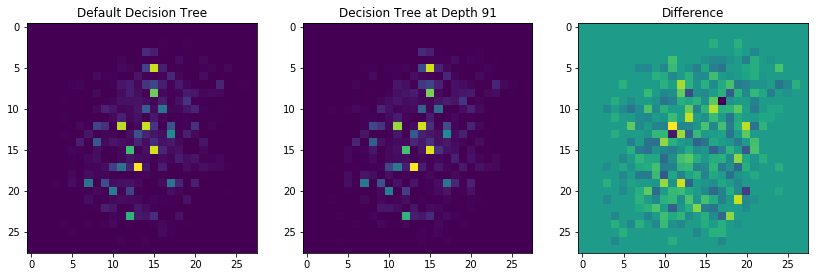

In [32]:
importances_dt = clf_dt.feature_importances_
importances_depth = clf_dt_best_depth.feature_importances_
indices_dt = np.argsort(importances_dt)[::-1]
indices_depth = np.argsort(importances_depth)[::-1]

heat_dt = importances_dt.reshape(28,28)
heat_depth = importances_depth.reshape(28,28)
heat_dif = heat_dt-heat_depth
plt.figure(figsize=(14,16))
plt.subplot(1,3,1)
plt.title('Default Decision Tree')
plt.imshow(heat_dt, interpolation='nearest')
plt.subplot(1,3,2)
plt.title('Decision Tree at Depth {}'.format(test_accuracy.index(max(test_accuracy))+1))
plt.imshow(heat_depth, interpolation='nearest')
plt.subplot(1,3,3)
plt.title('Difference')
plt.imshow(heat_dif, interpolation='nearest')
plt.show()